In [1]:
#Imports

import math
import numpy as np
from numpy import genfromtxt
from scipy import stats
from scipy.special import logit as lgTransform
from scipy.interpolate import UnivariateSpline
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pylab as plt 
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
%matplotlib inline

In [2]:
dfGeneSynon = pd.read_csv('synonMissenseLoFLOEUFCsvs/synonGenesNoCovg.csv', header=None)
synonObservedTxt = genfromtxt('synonMissenseLoFLOEUFCsvs/synonObservedNoCovg.csv', delimiter=',')
synonExpectedTxt = genfromtxt('synonMissenseLoFLOEUFCsvs/synonExpectedNoCovg.csv', delimiter=',')

print(dfGeneSynon)
print(synonObservedTxt)
print(synonExpectedTxt)

synonObserved = synonObservedTxt.tolist()
synonExpected = synonExpectedTxt.tolist()

dfGeneSynon = dfGeneSynon.iloc[1: , :]
dfGeneSynon.columns = ['gene_id']
print(dfGeneSynon.head())

dfGeneSynon['expected'] = synonExpected
dfGeneSynon['observed'] = synonObserved
print(dfGeneSynon.head())

                     0
0                    0
1      ENSG00000187634
2      ENSG00000188976
3      ENSG00000187961
4      ENSG00000187583
...                ...
16669  ENSG00000100288
16670  ENSG00000008735
16671  ENSG00000100299
16672  ENSG00000251322
16673  ENSG00000100312

[16674 rows x 1 columns]
[240. 313. 326. ... 144. 475.  57.]
[190.14024197 243.65328536 215.6460959  ... 151.85830493 493.45966566
  54.3739201 ]
           gene_id
1  ENSG00000187634
2  ENSG00000188976
3  ENSG00000187961
4  ENSG00000187583
5  ENSG00000187642
           gene_id    expected  observed
1  ENSG00000187634  190.140242     240.0
2  ENSG00000188976  243.653285     313.0
3  ENSG00000187961  215.646096     326.0
4  ENSG00000187583  191.923266     205.0
5  ENSG00000187642  170.595977     170.0


In [3]:
#Human gene quality control

dfHumanTranscriptQC = pd.read_csv('synonMissenseLoFLOEUFCsvs/human_transcript_coords.txt', sep='\t')
print(len(dfHumanTranscriptQC))
print(dfHumanTranscriptQC.head())

uniqueHumanGenes = dfHumanTranscriptQC.gene_id.unique()
print(uniqueHumanGenes)

945856
           gene_id       transcript  gene            exome chr  lower_bound  \
0  ENSG00000163131  ENST00000368985  CTSS  ENSE00001922877   1    150765698   
1  ENSG00000163131  ENST00000368985  CTSS  ENSE00001448523   1    150764638   
2  ENSG00000163131  ENST00000368985  CTSS  ENSE00003459282   1    150757858   
3  ENSG00000163131  ENST00000368985  CTSS  ENSE00003525779   1    150755001   
4  ENSG00000163131  ENST00000368985  CTSS  ENSE00003464542   1    150751781   

   upper_bound  
0    150765778  
1    150764764  
2    150757980  
3    150755150  
4    150752008  
['ENSG00000163131' 'ENSG00000143387' 'ENSG00000283324' ...
 'ENSG00000270467' 'ENSG00000281887' 'ENSG00000211880']


In [4]:
print(len(dfGeneSynon))
geneIntersect = np.intersect1d(dfGeneSynon['gene_id'].to_numpy(), uniqueHumanGenes)
print(len(geneIntersect))
print(geneIntersect)

geneDifference = np.setdiff1d(dfGeneSynon['gene_id'].to_numpy(), uniqueHumanGenes)
print(len(geneDifference))
print(geneDifference)

16673
16555
['ENSG00000000419' 'ENSG00000000457' 'ENSG00000000460' ...
 'ENSG00000286169' 'ENSG00000288558' 'ENSG00000288596']
118
['ENSG00000099977' 'ENSG00000117877' 'ENSG00000131152' 'ENSG00000142539'
 'ENSG00000144785' 'ENSG00000184154' 'ENSG00000188629' 'ENSG00000197991'
 'ENSG00000198211' 'ENSG00000241690' 'ENSG00000248751' 'ENSG00000249319'
 'ENSG00000249590' 'ENSG00000249773' 'ENSG00000250709' 'ENSG00000251184'
 'ENSG00000251357' 'ENSG00000251537' 'ENSG00000254692' 'ENSG00000254706'
 'ENSG00000254979' 'ENSG00000255432' 'ENSG00000255641' 'ENSG00000256100'
 'ENSG00000256349' 'ENSG00000256500' 'ENSG00000256591' 'ENSG00000256825'
 'ENSG00000257411' 'ENSG00000257921' 'ENSG00000258311' 'ENSG00000258417'
 'ENSG00000258465' 'ENSG00000258529' 'ENSG00000258691' 'ENSG00000259060'
 'ENSG00000259171' 'ENSG00000259371' 'ENSG00000259399' 'ENSG00000260007'
 'ENSG00000260170' 'ENSG00000260272' 'ENSG00000260342' 'ENSG00000260371'
 'ENSG00000260537' 'ENSG00000262660' 'ENSG00000263620' 'ENSG000002

In [5]:
# for i in range(len(geneDifference)): 
#     dfGeneSynon = dfGeneSynon[dfGeneSynon['gene_id'] != geneDifference[i]]
     
# print(len(dfGeneSynon))
# print(dfGeneSynon.head())

0.021760608624471264
6692.6898145866135


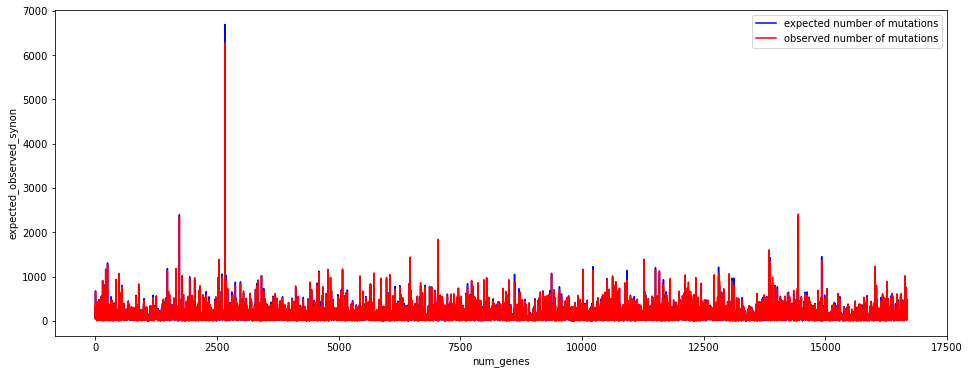

In [6]:
# plt.scatter(dfGeneSynon['gene_synonymous'], dfGeneSynon['expected'])
# plt.scatter(dfGeneSynon['gene_synonymous'], dfGeneSynon['observed'])
print(dfGeneSynon['expected'].min())
print(dfGeneSynon['expected'].max())
# plt.hist(dfGeneSynon['expected'])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.plot(dfGeneSynon['expected'], c = 'b', label = "expected number of mutations")
plt.plot(dfGeneSynon['observed'], c = 'r', label = "observed number of mutations")
plt.ylabel('expected_observed_synon')
plt.xlabel('num_genes')
plt.legend()

16673


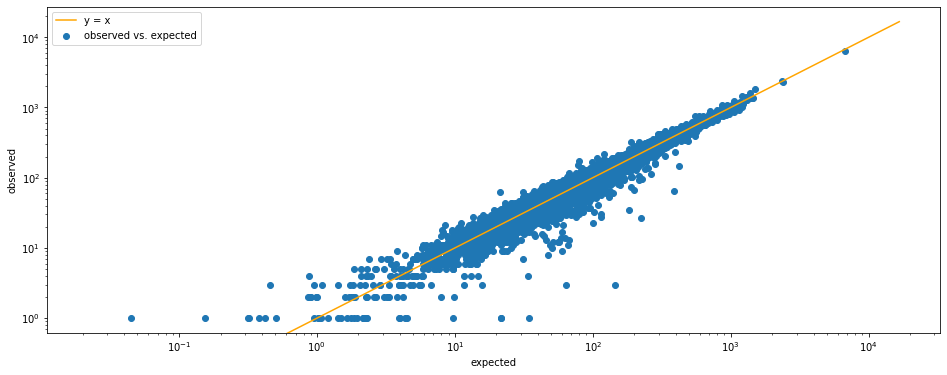

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
x_range = np.linspace(0, len(dfGeneSynon), len(dfGeneSynon))
y_range = np.linspace(0, len(dfGeneSynon), len(dfGeneSynon))
#print(len(x_range))
print(len(dfGeneSynon['expected']))
plt.scatter(dfGeneSynon['expected'], dfGeneSynon['observed'], label='observed vs. expected')
plt.plot(x_range, y_range, c = 'orange', label='y = x')
#plt.scatter(x_range, dfGeneSynon['observed'], label = "observed number of mutations")
plt.xscale("log")
plt.yscale("log")
plt.xlabel('expected')
plt.ylabel('observed')
plt.legend()

In [8]:
dfGeneSynon['observed/expected'] = dfGeneSynon['observed'] / dfGeneSynon['expected']
print(dfGeneSynon.head())

           gene_id    expected  observed  observed/expected
1  ENSG00000187634  190.140242     240.0           1.262226
2  ENSG00000188976  243.653285     313.0           1.284612
3  ENSG00000187961  215.646096     326.0           1.511736
4  ENSG00000187583  191.923266     205.0           1.068135
5  ENSG00000187642  170.595977     170.0           0.996507


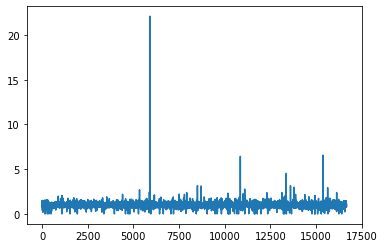

In [9]:
plt.plot(dfGeneSynon['observed/expected'])

In [10]:
# gene    transcript      obs_mis exp_mis oe_mis  mu_mis  possible_mis    obs_mis_pphen   exp_mis_pphen   oe_mis_pphen    possible_mis_pphen      obs_syn exp_syn oe_syn  mu_syn  possible_syn    obs_lof mu_lof  possible_lof    exp_lof pLI     pNull   pRec    oe_lof  oe_syn_lower    oe_syn_upper    oe_mis_lower    oe_mis_upper    oe_lof_lower    oe_lof_upper    constraint_flag syn_z   mis_z   lof_z   oe_lof_upper_rank       oe_lof_upper_bin        oe_lof_upper_bin_6      n_sites classic_caf     max_af  no_lofs obs_het_lof     obs_hom_lof     defined p       exp_hom_lof     classic_caf_afr classic_caf_amr classic_caf_asj classic_caf_eas classic_caf_fin classic_caf_nfe classic_caf_oth classic_caf_sas p_afr   p_amr   p_asj   p_eas   p_fin   p_nfe   p_oth   p_sas   transcript_type gene_id transcript_level        cds_length      num_coding_exons        gene_type       gene_length     exac_pLI        exac_obs_lof    exac_exp_lof    exac_oe_lof     brain_expression        chromosome      start_position  end_position
# SAMD11  ENST00000342066 546     3.6202e+02      1.5082e+00      2.0713e-05      4156    132     9.0043e+01      1.4660e+00      1102    270     1.5898e+02      1.6983e+00      9.2699e-06      1486    22      1.3068e-06      285     2.4538e+01      4.7681e-14      9.4979e-01      5.0208e-02      8.9656e-01      1.5370e+00      1.8750e+00      1.4050e+00      1.6190e+00      6.4000e-01      1.2800e+00      mis_too_many|syn_outlier        -6.9212e+00     -3.4361e+00     4.7484e-01      13738   7       4       34      1.9574e-03      1.1243e-03      125204  446     11      125661  1.8200e-03      4.1626e-01      5.1398e-03      1.4034e-03      6.1387e-04      8.4838e-03      4.9778e-04      1.2324e-03      1.6858e-03      1.0732e-03      4.8134e-03      1.3309e-03      5.9577e-04      7.9700e-03      4.6204e-04      1.1448e-03      1.4678e-03      1.0458e-03      protein_coding  ENSG00000187634 2       2043    13      protein_coding  19696   1.3538e-10      17      2.0005e+01      8.4979e-01      NA      1       860260  879955
# NOC2L   ENST00000327044 577     4.6201e+02      1.2489e+00      2.9346e-05      4856    140     1.3562e+02      1.0323e+00      1490    320     1.9938e+02      1.6049e+00      1.3672e-05      1471    43      2.1537e-06      447     4.1785e+01      2.8933e-29      9.9995e-01      5.2786e-05      1.0291e+00      1.4640e+00      1.7610e+00      1.1660e+00      1.3380e+00      8.0500e-01      1.3270e+00      mis_too_many|syn_outlier        -6.7147e+00     -1.9010e+00     -1.7417e-01     14172   7       4       70      8.1459e-04      1.8303e-04      125546  201     0       125747  7.9954e-04      8.0386e-02      6.8242e-04      4.3436e-04      4.2758e-03      9.3132e-04      4.6194e-05      8.3002e-04      1.3339e-03      5.0007e-04      6.7690e-04      4.3372e-04      4.2750e-03      9.2464e-04      4.6195e-05      8.0019e-04      1.3038e-03      4.9006e-04      protein_coding  ENSG00000188976 2       2247    19      protein_coding  15106   1.3304e-19      29      2.8884e+01      1.0040e+00      NA      1       879584  894689
# KLHL17  ENST00000338591 467     4.3355e+02      1.0772e+00      3.1317e-05      4083    167     1.7558e+02      9.5114e-01      1558    360     2.0109e+02      1.7903e+00      1.6269e-05      1359    26      1.6488e-06      292     2.8650e+01      1.3052e-16      9.7837e-01      2.1625e-02      9.0749e-01      1.6410e+00      1.9390e+00      9.9800e-01      1.1630e+00      6.6400e-01      1.2590e+00      syn_outlier     -8.8090e+00     -5.7094e-01     4.5884e-01      13521   7       4       33      2.4370e-04      5.2832e-05      125310  60      0       125370  2.3932e-04      7.1805e-03      0.0000e+00      2.3435e-04      0.0000e+00      2.1891e-04      0.0000e+00      3.7926e-04      1.6426e-04      1.6406e-04      0.0000e+00      2.3135e-04      0.0000e+00      2.1758e-04      0.0000e+00      3.7124e-04      1.6341e-04      1.6334e-04      protein_coding  ENSG00000187961 2       1926    12      protein_coding  5129    2.5168e-07      13      1.8832e+01      6.9030e-01      NA      1       895967  901095
# PLEKHN1 ENST00000379410 480     3.8117e+02      1.2593e+00      2.4060e-05      3802    135     9.7727e+01      1.3814e+00      1147    216     1.7452e+02      1.2377e+00      1.1429e-05      1323    25      1.5693e-06      332     3.1069e+01      1.1549e-14      8.5111e-01      1.4889e-01      8.0467e-01      1.1070e+00      1.3850e+00      1.1680e+00      1.3580e+00      5.8500e-01      1.1240e+00      mis_too_many    -2.4681e+00     -1.7988e+00     1.0089e+00      12118   6       3       50      8.7804e-04      2.5184e-04      125455  177     1       125633  7.0866e-04      6.3093e-02      2.7152e-03      2.0908e-04      1.0898e-04      2.8479e-04      0.0000e+00      5.8498e-04      7.3836e-04      2.8601e-03      2.5889e-03      2.0239e-04      9.9369e-05      2.7189e-04      0.0000e+00      5.1078e-04      6.5253e-04      1.9944e-03      protein_coding  ENSG00000187583 2       1833    16      protein_coding  9369    2.0197e-08      15      2.1150e+01      7.0923e-01      NA      1       901877  911245
# HES4    ENST00000428771 103     9.0430e+01      1.1390e+00      4.1431e-06      1473    30      3.0382e+01      9.8741e-01      389     53      4.1769e+01      1.2689e+00      1.9868e-06      588     6       1.5251e-07      49      3.5300e+00      1.3746e-05      8.7001e-01      1.2998e-01      1.6997e+00      1.0170e+00      1.5950e+00      9.7000e-01      1.3420e+00      8.1600e-01      1.9470e+00              -1.3661e+00     -4.6973e-01     -1.2182e+00     18996   9       5       8       1.8299e-04      7.2816e-05      124573  44      0       124617  1.7656e-04      3.8846e-03      1.3773e-04      8.8595e-05      0.0000e+00      1.1039e-03      0.0000e+00      1.1713e-04      0.0000e+00      2.3060e-04      1.2583e-04      8.7112e-05      0.0000e+00      1.0457e-03      0.0000e+00      1.1556e-04      0.0000e+00      2.2943e-04      protein_coding  ENSG00000188290 2       741     3       protein_coding  1211    1.4794e-04      5       3.4895e+00      1.4329e+00      NA      1       934342  935552

In [11]:
dfByGene = pd.read_csv('all_lofs/gene_lofs/gnomad.v2.1.1.lof_metrics.by_gene.txt', delimiter = '\t')
print(len(dfByGene))
print(dfByGene.head())

19704
    gene       transcript  obs_mis  exp_mis   oe_mis    mu_mis  possible_mis  \
0  MED13  ENST00000397786      871  1117.80  0.77921  0.000056         14195   
1  NIPBL  ENST00000282516      846  1441.50  0.58688  0.000074         18540   
2   SMC3  ENST00000361804      178   630.07  0.28251  0.000032          8109   
3  CNOT1  ENST00000317147      561  1295.90  0.43290  0.000069         15670   
4    RLF  ENST00000372771      669   972.87  0.68766  0.000047         12682   

   obs_mis_pphen  exp_mis_pphen  oe_mis_pphen  ...       gene_type  \
0          314.0         529.75       0.59273  ...  protein_coding   
1          158.0         543.10       0.29092  ...  protein_coding   
2           21.0         182.52       0.11506  ...  protein_coding   
3           51.0         290.68       0.17545  ...  protein_coding   
4          107.0         321.14       0.33319  ...  protein_coding   

   gene_length  exac_pLI  exac_obs_lof  exac_exp_lof  exac_oe_lof  \
0       122678       1.

In [12]:
print(dfByGene.columns)

Index(['gene', 'transcript', 'obs_mis', 'exp_mis', 'oe_mis', 'mu_mis',
       'possible_mis', 'obs_mis_pphen', 'exp_mis_pphen', 'oe_mis_pphen',
       'possible_mis_pphen', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn',
       'possible_syn', 'obs_lof', 'mu_lof', 'possible_lof', 'exp_lof', 'pLI',
       'pNull', 'pRec', 'oe_lof', 'oe_syn_lower', 'oe_syn_upper',
       'oe_mis_lower', 'oe_mis_upper', 'oe_lof_lower', 'oe_lof_upper',
       'constraint_flag', 'syn_z', 'mis_z', 'lof_z', 'oe_lof_upper_rank',
       'oe_lof_upper_bin', 'oe_lof_upper_bin_6', 'n_sites', 'classic_caf',
       'max_af', 'no_lofs', 'obs_het_lof', 'obs_hom_lof', 'defined', 'p',
       'exp_hom_lof', 'classic_caf_afr', 'classic_caf_amr', 'classic_caf_asj',
       'classic_caf_eas', 'classic_caf_fin', 'classic_caf_nfe',
       'classic_caf_oth', 'classic_caf_sas', 'p_afr', 'p_amr', 'p_asj',
       'p_eas', 'p_fin', 'p_nfe', 'p_oth', 'p_sas', 'transcript_type',
       'gene_id', 'transcript_level', 'cds_length', 'num_codi

In [13]:
dfReferenceOEMetrics = dfByGene[['gene','gene_id', 'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof','oe_syn_lower','oe_syn_upper', 'oe_lof_lower','oe_lof_upper']]
print(dfReferenceOEMetrics.head())
print(len(dfReferenceOEMetrics))

    gene          gene_id  gene_length  obs_syn  exp_syn  oe_syn    mu_syn  \
0  MED13  ENSG00000108510       122678      422   387.53  1.0890  0.000019   
1  NIPBL  ENSG00000164190       189655      496   495.01  1.0020  0.000025   
2   SMC3  ENSG00000108055        36946      215   203.25  1.0578  0.000010   
3  CNOT1  ENSG00000125107       109936      470   456.03  1.0306  0.000024   
4    RLF  ENSG00000117000        79549      358   352.62  1.0153  0.000017   

     oe_lof  oe_syn_lower  oe_syn_upper  oe_lof_lower  oe_lof_upper  
0  0.000000         1.005         1.180         0.000         0.030  
1  0.006653         0.930         1.079         0.001         0.032  
2  0.000000         0.946         1.184         0.000         0.037  
3  0.007998         0.955         1.112         0.002         0.038  
4  0.000000         0.930         1.108         0.000         0.040  
19704


In [14]:
snv_genes = dfGeneSynon['gene_id']
print(len(snv_genes))

dfReferenceOEMetricsRefined = dfReferenceOEMetrics.loc[dfReferenceOEMetrics['gene_id'].isin(snv_genes)]

#dfReferenceOEMetricsRefined = dfReferenceOEMetrics[dfReferenceOEMetrics['gene_id'] == snv_genes].values
print(dfReferenceOEMetricsRefined.head())
print(len(dfReferenceOEMetricsRefined))

dfMerged = pd.merge(dfGeneSynon, dfReferenceOEMetricsRefined, on='gene_id', how='inner')
dfMerged['expected/gene_length'] = dfMerged['expected'] / dfMerged['gene_length']
print(dfMerged.head())
print(len(dfMerged))

16673
    gene          gene_id  gene_length  obs_syn  exp_syn  oe_syn    mu_syn  \
0  MED13  ENSG00000108510       122678      422   387.53  1.0890  0.000019   
1  NIPBL  ENSG00000164190       189655      496   495.01  1.0020  0.000025   
2   SMC3  ENSG00000108055        36946      215   203.25  1.0578  0.000010   
3  CNOT1  ENSG00000125107       109936      470   456.03  1.0306  0.000024   
4    RLF  ENSG00000117000        79549      358   352.62  1.0153  0.000017   

     oe_lof  oe_syn_lower  oe_syn_upper  oe_lof_lower  oe_lof_upper  
0  0.000000         1.005         1.180         0.000         0.030  
1  0.006653         0.930         1.079         0.001         0.032  
2  0.000000         0.946         1.184         0.000         0.037  
3  0.007998         0.955         1.112         0.002         0.038  
4  0.000000         0.930         1.108         0.000         0.040  
16350
           gene_id    expected  observed  observed/expected      gene  \
0  ENSG00000187634  190.14

In [15]:
# # Alpha value calculated between 0 and 2 uniformly
# alpha_range = np.linspace(0,2,len(dfMerged))
# print(alpha_range)

# lambdas = dfMerged['expected'] * alpha_range
# print(lambdas)

# probPoissonArray = np.zeros(len(lambdas))
# observed = dfMerged['observed'].values

# for i in range(len(lambdas)):
#     s = stats.poisson.pmf(observed[i], lambdas[i])
#     probPoissonArray[i] = s
    
# print(probPoissonArray)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, probPoissonArray)

In [16]:
# cdfPoissonArray = np.cumsum(probPoissonArray)
# print(cdfPoissonArray)
# print(len(cdfPoissonArray))
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, cdfPoissonArray)

In [17]:
# lowerBound = np.percentile(cdfPoissonArray, 5)
# upperBound = np.percentile(cdfPoissonArray, 95)

# print(lowerBound)
# print("LOEUF: ", upperBound)

# fifthPercentile = [lowerBound for i in range(len(alpha_range))]
# ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, cdfPoissonArray)
# plt.plot(alpha_range, fifthPercentile, c = 'r')
# plt.plot(alpha_range, ninetyFifthPercentile, c = 'r')

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.97898548e-15
 2.93749433e-15 2.89657411e-15]
1.2674855017923232


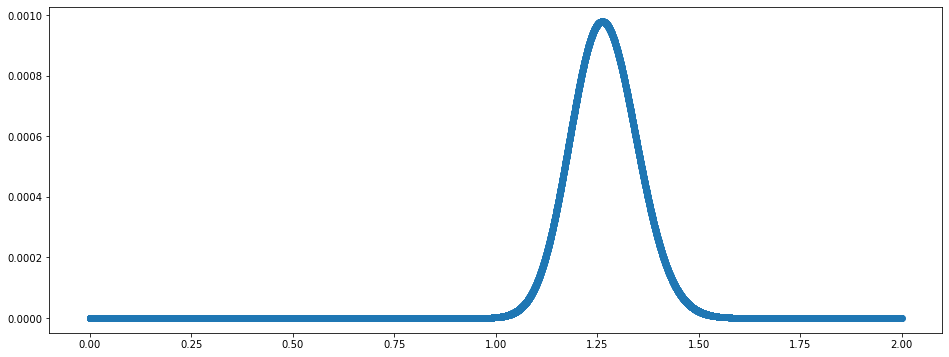

In [18]:
#Only first gene

N_points = 10000
alpha_range = np.linspace(0, 2, N_points)

posterior = stats.poisson.pmf(dfMerged['observed'][0], dfMerged['expected'][0]*alpha_range)
print(posterior)
posterior_prob = posterior/np.sum(posterior)
posterior_mean = np.sum(alpha_range*posterior_prob)
print(posterior_mean)
cdf_gene = np.cumsum(posterior_prob)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, posterior_prob)

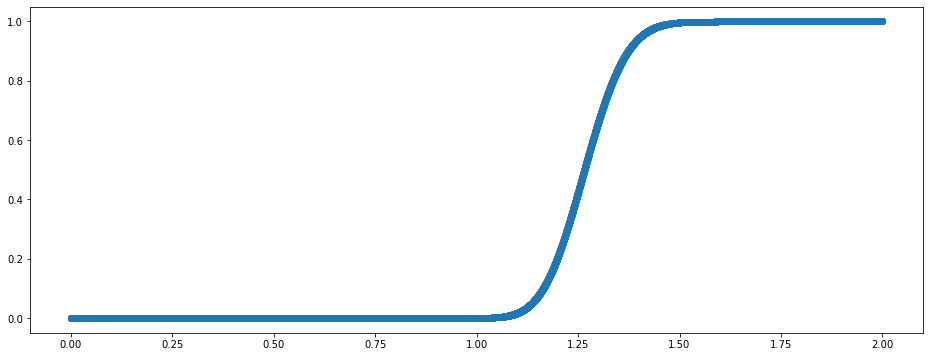

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, cdf_gene)

Lower Bound:  1.1363136313631363
Upper Bound:  1.4047404740474048


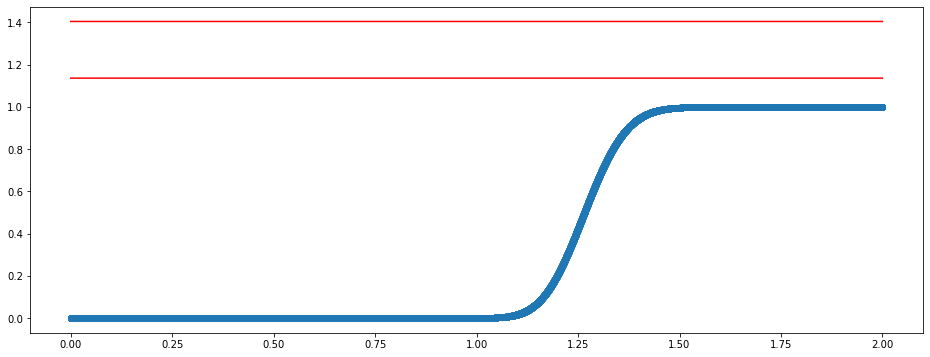

In [20]:
# lowerBound = np.percentile(cdf_gene, 5, interpolation='nearest')
# upperBound = np.percentile(cdf_gene, 95, interpolation='nearest')

lowerBound = alpha_range[np.searchsorted(cdf_gene, 0.05, side="left")]
upperBound = alpha_range[np.searchsorted(cdf_gene, 0.95, side="right")]

print("Lower Bound: ", lowerBound)
print("Upper Bound: ", upperBound)

fifthPercentile = [lowerBound for i in range(len(alpha_range))]
ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.scatter(alpha_range, cdf_gene)
plt.plot(alpha_range, fifthPercentile, c = 'r')
plt.plot(alpha_range, ninetyFifthPercentile, c = 'r')

# x_intercept_lower = 0
# for i in range(len(alpha_range)):
#     if (lowerBound > cdf_gene[i]):
#         x_intercept_lower = i
        
# x_intercept_upper = 0
# for i in range(len(alpha_range)):
#     if (upperBound > cdf_gene[i]):
#         x_intercept_upper = i
        
#x_intercept_lower = cdf_gene.tolist().index(lowerBound)
#x_intercept_upper = cdf_gene.tolist().index(upperBound)
        
# print(x_intercept_lower)
# print("Lower Bound: ", alpha_range[x_intercept_lower])

# print(x_intercept_upper)
# print("LOEUF: ", alpha_range[x_intercept_upper])

In [21]:
#Full synon LOEUF

lowerBoundArray = np.zeros(len(dfMerged))
LOEUFArray = np.zeros(len(dfMerged))
posterior_meanArray = np.zeros(len(dfMerged))

for i in range(len(dfMerged)):
    N_points = 10000
    alpha_range = np.linspace(0, 2, N_points)

    posterior = stats.poisson.pmf(dfMerged['observed'][i], dfMerged['expected'][i]*alpha_range)
    #print(posterior)
    posterior_prob = posterior/np.sum(posterior)
    posterior_mean = np.sum(alpha_range*posterior_prob)
    posterior_meanArray[i] = posterior_mean
    #print(posterior_mean)
    cdf_gene = np.cumsum(posterior_prob)
    
    lowerBound = alpha_range[np.searchsorted(cdf_gene, 0.05, side="left")]
    upperBound = alpha_range[np.searchsorted(cdf_gene, 0.95, side="right")]

    fifthPercentile = [lowerBound for i in range(len(alpha_range))]
    ninetyFifthPercentile = [upperBound for i in range(len(alpha_range))]

#     x_intercept_lower = 0
#     for j in range(len(alpha_range)):
#         if (lowerBound > cdf_gene[j]):
#             x_intercept_lower = j

#     x_intercept_upper = 0
#     for j in range(len(alpha_range)):
#         if (upperBound > cdf_gene[j]):
#             x_intercept_upper = j
            
    #x_intercept_lower = cdf_gene.tolist().index(lowerBound)
    #x_intercept_upper = cdf_gene.tolist().index(upperBound)
    
    #print(x_intercept_lower)
    #print("Lower Bound: ", alpha_range[x_intercept_lower])
    lowerBoundArray[i] = lowerBound
    
    #print(x_intercept_upper)
    #print("LOEUF: ", alpha_range[x_intercept_upper])
    LOEUFArray[i] = upperBound
    
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
# plt.scatter(alpha_range, posterior_prob)
print("Lower Bound Array: ", lowerBoundArray)
print("LOEUF Array: ", LOEUFArray)
print("Posterior_Mean Array: ", posterior_meanArray)

Lower Bound Array:  [1.13631363 1.17151715 1.38113811 ... 0.82828283 0.89308931 0.84728473]
LOEUF Array:  [1.40474047 1.41054105 1.6569657  ... 1.08890889 1.03850385 1.30713071]
Posterior_Mean Array:  [1.2674855  1.28871646 1.51637335 ... 0.95483747 0.96461785 1.06668782]


In [22]:
print(LOEUFArray.min())
print(LOEUFArray.max())
print(dfMerged['oe_syn_upper'].min())
print(dfMerged['oe_syn_upper'].max())

0.0338033803380338
1.995799579957996
0.59
1.999


In [23]:
dfMerged['lower_oe_bound'] = lowerBoundArray.tolist()
dfMerged['LOEUF'] = LOEUFArray.tolist()
dfMerged['posterior_distribution_mean'] = posterior_meanArray.tolist()
print(dfMerged.head())

           gene_id    expected  observed  observed/expected      gene  \
0  ENSG00000187634  190.140242     240.0           1.262226    SAMD11   
1  ENSG00000188976  243.653285     313.0           1.284612     NOC2L   
2  ENSG00000187961  215.646096     326.0           1.511736    KLHL17   
3  ENSG00000187583  191.923266     205.0           1.068135   PLEKHN1   
4  ENSG00000187642  170.595977     170.0           0.996507  C1orf170   

   gene_length  obs_syn  exp_syn  oe_syn    mu_syn   oe_lof  oe_syn_lower  \
0        19696      270   158.98  1.6983  0.000009  0.89656         1.537   
1        15106      320   199.38  1.6049  0.000014  1.02910         1.464   
2         5129      360   201.09  1.7903  0.000016  0.90749         1.641   
3         9369      216   174.52  1.2377  0.000011  0.80467         1.107   
4         6919      215   174.81  1.2299  0.000012  1.18260         1.100   

   oe_syn_upper  oe_lof_lower  oe_lof_upper  expected/gene_length  \
0         1.875         0.640

16350
16350


Text(0, 0.5, 'Calculated LOEUF')

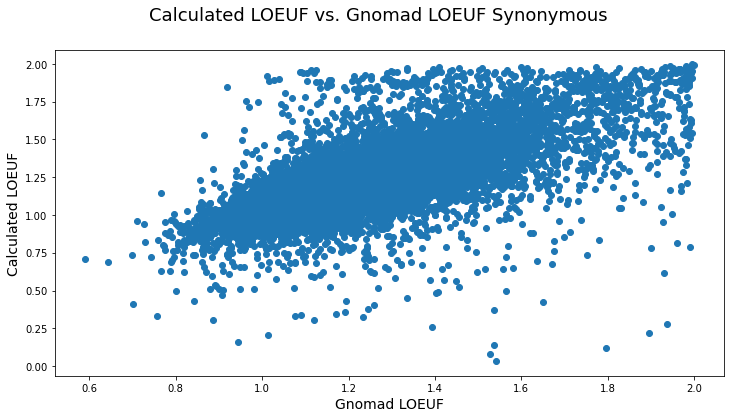

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
print(len(dfMerged['oe_lof_upper']))
print(len(dfMerged['LOEUF']))

plt.scatter(dfMerged['oe_syn_upper'], dfMerged['LOEUF'])
fig.suptitle('Calculated LOEUF vs. Gnomad LOEUF Synonymous', fontsize=18)
plt.xlabel('Gnomad LOEUF', fontsize = 14)
plt.ylabel('Calculated LOEUF', fontsize = 14)

22.103374828716248


Text(0, 0.5, 'Observed/Expected')

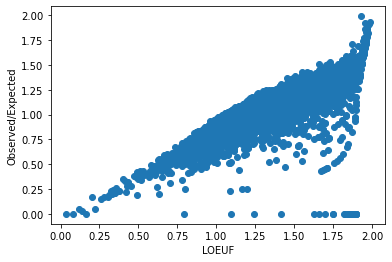

In [25]:
print(dfMerged['observed/expected'].max())
dfMergedNoOutlier = dfMerged[dfMerged['observed/expected'] <= 2.0]
plt.scatter(dfMergedNoOutlier['LOEUF'], dfMergedNoOutlier['observed/expected'])
plt.xlabel('LOEUF')
plt.ylabel('Observed/Expected')

Text(0, 0.5, 'Frequency')

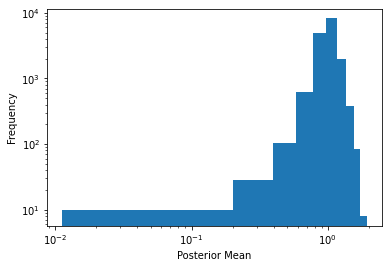

In [26]:
plt.hist(dfMerged['posterior_distribution_mean'])
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Posterior Mean')
plt.ylabel('Frequency')

6278.0


Text(0, 0.5, 'LOEUF')

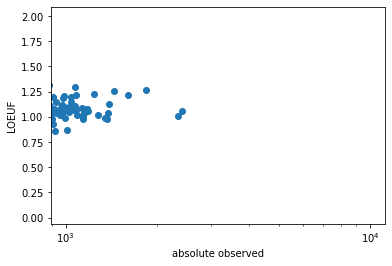

In [27]:
print(dfMerged['observed'].max())
dfMergedNoOutlier1 = dfMerged[dfMerged['observed'] <= 5000]
plt.scatter(dfMergedNoOutlier1['observed'], dfMergedNoOutlier1['LOEUF'])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel('absolute observed')
plt.ylabel('LOEUF')

In [28]:
dfMerged['calculated_oe_std_dev'] = ((dfMerged['observed'] - dfMerged['expected']) / np.sqrt(dfMerged['expected']))
dfMerged['gnomad_oe_std_dev'] = ((dfMerged['obs_syn'] - dfMerged['exp_syn']) / np.sqrt(dfMerged['exp_syn']))
print(dfMerged.head())
print(len(dfMerged))

           gene_id    expected  observed  observed/expected      gene  \
0  ENSG00000187634  190.140242     240.0           1.262226    SAMD11   
1  ENSG00000188976  243.653285     313.0           1.284612     NOC2L   
2  ENSG00000187961  215.646096     326.0           1.511736    KLHL17   
3  ENSG00000187583  191.923266     205.0           1.068135   PLEKHN1   
4  ENSG00000187642  170.595977     170.0           0.996507  C1orf170   

   gene_length  obs_syn  exp_syn  oe_syn    mu_syn  ...  oe_syn_lower  \
0        19696      270   158.98  1.6983  0.000009  ...         1.537   
1        15106      320   199.38  1.6049  0.000014  ...         1.464   
2         5129      360   201.09  1.7903  0.000016  ...         1.641   
3         9369      216   174.52  1.2377  0.000011  ...         1.107   
4         6919      215   174.81  1.2299  0.000012  ...         1.100   

   oe_syn_upper  oe_lof_lower  oe_lof_upper  expected/gene_length  \
0         1.875         0.640         1.280          

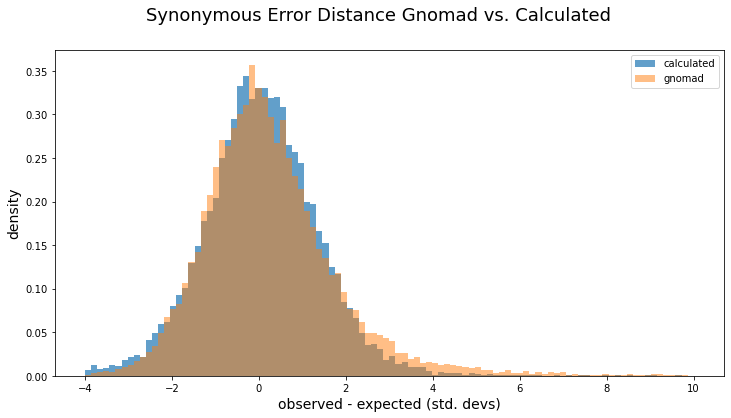

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.hist((dfMerged.observed - dfMerged.expected)/np.sqrt(dfMerged.expected), label='calculated', range=[-4, 10], bins = 100, alpha=0.7, density=True)
plt.hist((dfMerged.obs_syn - dfMerged.exp_syn)/np.sqrt(dfMerged.exp_syn), label='gnomad', range=[-4, 10], bins = 100, alpha=0.5, density=True)
fig.suptitle('Synonymous Error Distance Gnomad vs. Calculated', fontsize=18)
plt.xlabel("observed - expected (std. devs)", fontsize = 14)
plt.ylabel("density", fontsize = 14)
plt.legend()

In [30]:
dfSynonymous = dfMerged.drop(['calculated_oe_std_dev', 'gnomad_oe_std_dev'], axis=1)
print(dfSynonymous.columns)
dfSynonymous.columns = [['gene_id', 'expected_SYN', 'observed_SYN', 'observed/expected_SYN', 'gene_SYN',
       'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof',
       'oe_syn_lower', 'oe_syn_upper', 'oe_lof_lower', 'oe_lof_upper',
       'expected/gene_length', 'lower_oe_bound', 'LOEUF_SYN',
       'posterior_distribution_mean_SYN']]
print(dfSynonymous.head())

Index(['gene_id', 'expected', 'observed', 'observed/expected', 'gene',
       'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof',
       'oe_syn_lower', 'oe_syn_upper', 'oe_lof_lower', 'oe_lof_upper',
       'expected/gene_length', 'lower_oe_bound', 'LOEUF',
       'posterior_distribution_mean'],
      dtype='object')
           gene_id expected_SYN observed_SYN observed/expected_SYN  gene_SYN  \
0  ENSG00000187634   190.140242        240.0              1.262226    SAMD11   
1  ENSG00000188976   243.653285        313.0              1.284612     NOC2L   
2  ENSG00000187961   215.646096        326.0              1.511736    KLHL17   
3  ENSG00000187583   191.923266        205.0              1.068135   PLEKHN1   
4  ENSG00000187642   170.595977        170.0              0.996507  C1orf170   

  gene_length obs_syn exp_syn  oe_syn    mu_syn   oe_lof oe_syn_lower  \
0       19696     270  158.98  1.6983  0.000009  0.89656        1.537   
1       15106     320  199.38  1.6049 

In [31]:
#dfSynonymous.to_csv('synonMetrics.csv', index=False)

1620146
16350
                                 OLS Regression Results                                
Dep. Variable:               expected   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.574e+06
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        14:43:10   Log-Likelihood:                         -70917.
No. Observations:               16350   AIC:                                  1.418e+05
Df Residuals:                   16349   BIC:                                  1.418e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

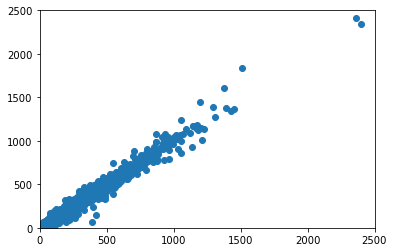

In [32]:
dfSynonymousWithMedian = pd.read_csv('dfFilterQuality80Synonymous.csv')
#print(dfSynonymousWithMedian.head())
print(len(dfSynonymousWithMedian))
#print(dfMerged.head())
print(len(dfMerged))
plt.scatter(dfMerged['expected'],dfMerged['observed'])
plt.xlim([0,2500])
plt.ylim([0,2500])

oVeLinear = sm.OLS(dfMerged['expected'], dfMerged['observed'])
oVeSummary = oVeLinear.fit()
print(oVeSummary.summary())

In [33]:
#Don't actually remove human transcript qc points, just color them differently

dfRemoved = pd.DataFrame(columns = ['gene_id', 'expected', 'observed', 'observed/expected', 'gene',
       'gene_length', 'obs_syn', 'exp_syn', 'oe_syn', 'mu_syn', 'oe_lof',
       'oe_syn_lower', 'oe_syn_upper', 'oe_lof_lower', 'oe_lof_upper',
       'expected/gene_length', 'lower_oe_bound', 'LOEUF',
       'posterior_distribution_mean', 'calculated_oe_std_dev',
       'gnomad_oe_std_dev'])
print(len(dfRemoved))

for i in range(len(geneDifference)):
    newRow = dfMerged.loc[dfMerged['gene_id'] == geneDifference[i]]
    #print(newRow)
    dfRemoved = dfRemoved.append(newRow)

print(len(dfRemoved))
print(dfRemoved.head())

0
75
               gene_id    expected  observed  observed/expected  \
16036  ENSG00000099977    4.991324       7.0           1.402434   
14827  ENSG00000117877  110.531552     102.0           0.922813   
12578  ENSG00000131152   10.959516      13.0           1.186184   
14993  ENSG00000142539    0.021761       0.0           0.000000   
10011  ENSG00000144785    4.216873       4.0           0.948570   

                 gene gene_length obs_syn  exp_syn   oe_syn        mu_syn  \
16036             DDT        9107       7    4.970  1.40840  2.982000e-07   
14827          CD3EAP        4558     120  120.530  0.99558  6.808400e-06   
12578    RP11-178L8.4       31398      70   64.866  1.07910  4.575700e-06   
14993    CTD-2545M3.6       12611      98  111.450  0.87935  8.037200e-06   
10011  RP11-977G19.10       30144      44   53.736  0.81881  2.774800e-06   

       ...  oe_syn_lower  oe_syn_upper  oe_lof_lower  oe_lof_upper  \
16036  ...         0.758         1.919         0.000       

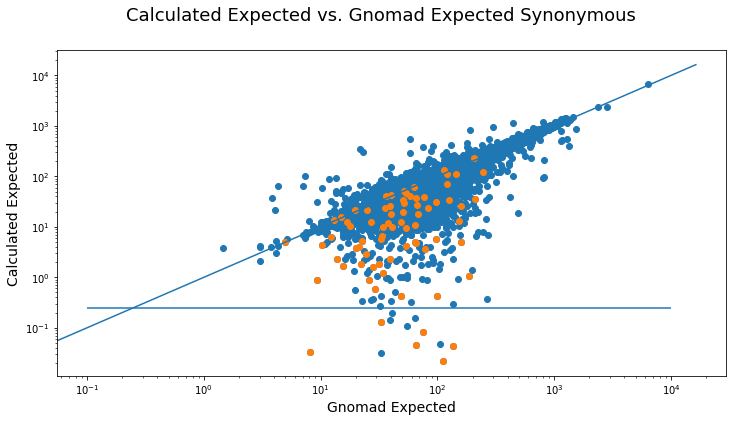

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

plt.scatter(dfMerged['exp_syn'], dfMerged['expected'])
plt.scatter(dfRemoved['exp_syn'], dfRemoved['expected'])
fig.suptitle('Calculated Expected vs. Gnomad Expected Synonymous', fontsize=18)
plt.xlabel('Gnomad Expected', fontsize = 14)
plt.ylabel('Calculated Expected', fontsize = 14)

x_range = np.linspace(0, len(dfMerged), len(dfMerged))
y_range = np.linspace(0, len(dfMerged), len(dfMerged))
plt.xscale("log")
plt.yscale("log")
plt.plot(x_range, y_range, label='help')
plt.hlines(0.25, 0.1, 10000)

In [35]:
# dfMerged['expected_difference'] = np.abs(dfMerged['expected'] - dfMerged['exp_syn'])
# print(dfMerged.head())
# print(dfMerged['expected_difference'].max())
# plt.plot(dfMerged['expected_difference'])

In [36]:
dfGenesBelowQuarter = dfMerged[dfMerged['expected'] <= 0.25]
print(len(dfGenesBelowQuarter))
print(dfGenesBelowQuarter)

genesBelowQuarter = dfGenesBelowQuarter['gene_id'].to_numpy()
print(genesBelowQuarter)

12
               gene_id  expected  observed  observed/expected           gene  \
5821   ENSG00000249319  0.045242       1.0          22.103375     AC068533.7   
8296   ENSG00000165828  0.197677       0.0           0.000000          PRAP1   
9634   ENSG00000205809  0.140569       0.0           0.000000          KLRC2   
9998   ENSG00000257411  0.130337       0.0           0.000000  RP11-603J24.9   
10658  ENSG00000139675  0.155403       1.0           6.434891      HNRNPA1L2   
10899  ENSG00000255526  0.031154       0.0           0.000000     NEDD8-MDP1   
11574  ENSG00000137878  0.048289       0.0           0.000000          GCOM1   
12143  ENSG00000243716  0.110241       0.0           0.000000         NPIPB5   
13382  ENSG00000267318  0.033571       0.0           0.000000   RP11-178C3.1   
14644  ENSG00000268083  0.082611       0.0           0.000000     AC104534.3   
14993  ENSG00000142539  0.021761       0.0           0.000000   CTD-2545M3.6   
16093  ENSG00000248751  0.044069     